In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
df = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='salary', ylabel='count'>

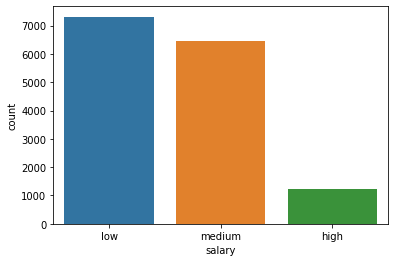

In [7]:
# Count of salary
sns.countplot(x = 'salary',data = df)

In [8]:
salary = df.groupby('salary')['salary'].agg('count').sort_values(ascending = False)
salary

salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

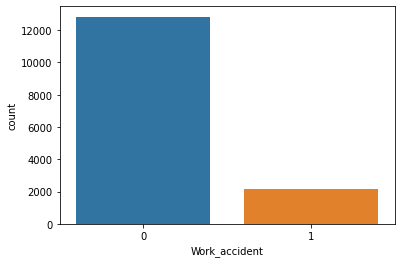

In [9]:
# Number of work related accidents had in company
sns.countplot('Work_accident',data = df)

In [10]:
Work_accident = df.groupby('Work_accident')['Work_accident'].agg('count').sort_values(ascending = False)
Work_accident

Work_accident
0    12830
1     2169
Name: Work_accident, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='left', ylabel='count'>

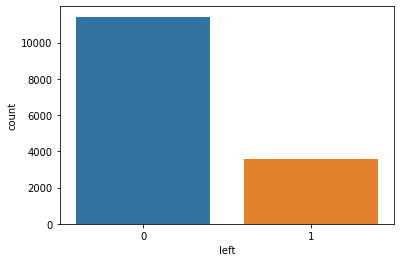

In [11]:
# Count of employees who left the company
sns.countplot('left', data = df)

In [12]:
left = df.groupby('left')['left'].agg('count').sort_values(ascending = False)
left

left
0    11428
1     3571
Name: left, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

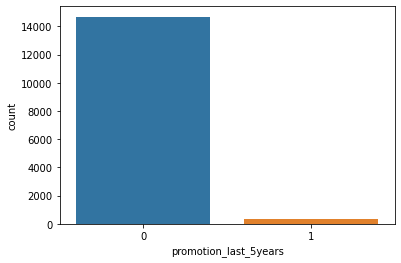

In [13]:
# Count of employees who had promotion in last 5 years.
sns.countplot('promotion_last_5years', data = df)

In [14]:
promotion_last_5years = df.groupby('promotion_last_5years')['promotion_last_5years'].agg('count').sort_values(ascending = False)
promotion_last_5years

promotion_last_5years
0    14680
1      319
Name: promotion_last_5years, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Department', ylabel='count'>

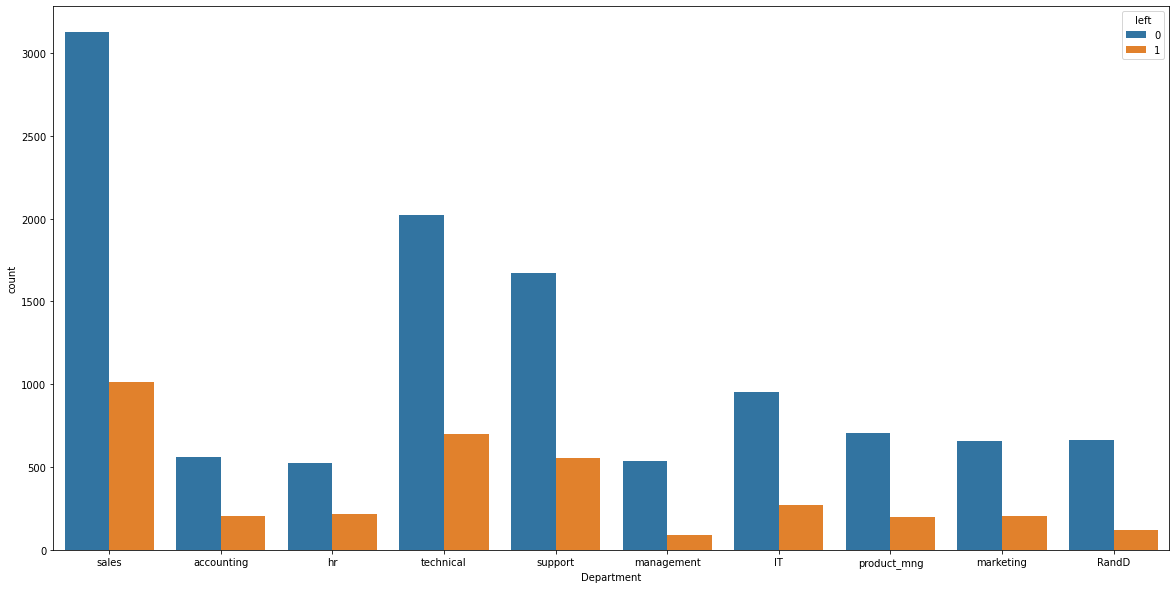

In [15]:
# Department
plt.figure(figsize =(20,10))
sns.countplot('Department', data = df,hue = 'left')

<AxesSubplot:xlabel='satisfaction_level', ylabel='Department'>

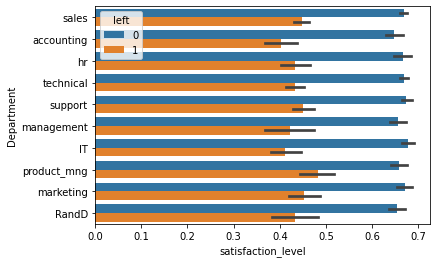

In [16]:
sns.barplot(x='satisfaction_level', y = 'Department',data = df, hue = 'left')

<AxesSubplot:xlabel='last_evaluation', ylabel='Department'>

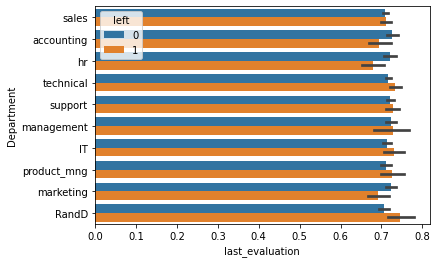

In [17]:
# Which department had last evaluation and the employee left the firm?
sns.barplot(x='last_evaluation', y = 'Department',data = df, hue = 'left')

<AxesSubplot:xlabel='time_spend_company', ylabel='average_montly_hours'>

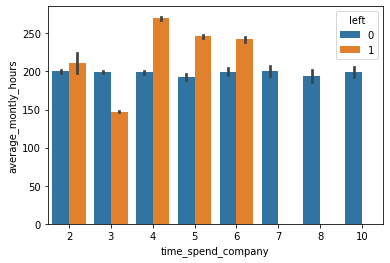

In [18]:
# Average monthly hours spent by employee during their time spend in company and the people left the company.

sns.barplot(x = 'time_spend_company', y = 'average_montly_hours',data = df, hue = 'left')


In [19]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [20]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [21]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction Level:-  satisfaction level is relatively low who are leaving the firm.
Average-monthly_hours :- Average_monthly_hours are high who are leaving the firm.
promotion_last_5years :- people who get low number of promotion leaving the firm.

From further analysis 'satisfaction_level','average_montly_hours','promotion_last_5years','salary' are the columns which we are going to analysis further.

In [22]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# Converting categorical values into numerical values using LabelEncoder

In [23]:
salary_dummy = pd.get_dummies(df1['salary'], prefix = 'salary')
salary_dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [24]:
new_df = df1.drop('salary', axis =1)
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


# Normalization

Normalization in machine learning is the process of translating data into the range [0, 1] (or any other range) or simply transforming data onto the unit sphere.

In [25]:
 from sklearn.preprocessing import Normalizer
norm_df = Normalizer().fit_transform(new_df)

final_df = pd.DataFrame(norm_df, columns = new_df.columns)
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.002420,0.999997,0.0
1,0.003053,0.999995,0.0
2,0.000404,1.000000,0.0
3,0.003229,0.999995,0.0
4,0.002327,0.999997,0.0


In [26]:
final_df = pd.concat([final_df,salary_dummy], axis = "columns")
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.002420,0.999997,0.0,0,1,0
1,0.003053,0.999995,0.0,0,0,1
2,0.000404,1.000000,0.0,0,0,1
3,0.003229,0.999995,0.0,0,1,0
4,0.002327,0.999997,0.0,0,1,0


In [27]:
x = final_df
y = df.left

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [31]:
x_train.shape

(11249, 6)

In [32]:
x_test.shape

(3750, 6)

In [33]:
clf.fit(x_train,y_train)

LogisticRegression()

In [34]:
clf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

# Model Accuracy

In [35]:
clf.score(x_test,y_test)

0.7682666666666667